# ANOVA Test

* **ANOVA**
    * "Analysis of Variance Test"
* **Factorial ANOVA**
    * Comparing <strong> multiple groups </strong>
        * Analysis of effects of **multiple independent variables** (3 or more)
* **Repeated Measures ANOVA** 
    * Longitudinal studies
* **ANCOVA**
    * "Analysis of Covariance"
    * ANOVA + regression
    * Checking if average outcomes, after considering other influencing factors, differ based on specific categories
* **MANCOVA**
    * "Multivariate Analysis of Variance"
    * Useful for cases when there are <strong>multiple dependent variables</strong>
* Uses:
    * **Medical:** Comparing effects of different medicines
    * **Agriculture:** Checking yields of different crop types
    * **Marketing:** Testing preferences among products
    * **Education:** Comparing teaching methods' impact on scores

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
diamonds = sns.load_dataset("diamonds")
diamonds = pd.read_csv("diamonds.csv")
diamonds2 = pd.read_csv("diamonds2.csv")

In [3]:
diamonds.head()

,color,price,log_price
0,E,326,5.786897
1,E,326,5.786897
2,E,327,5.789960
3,I,334,5.811141
4,I,336,5.817111


<Axes: xlabel='color', ylabel='log_price'>

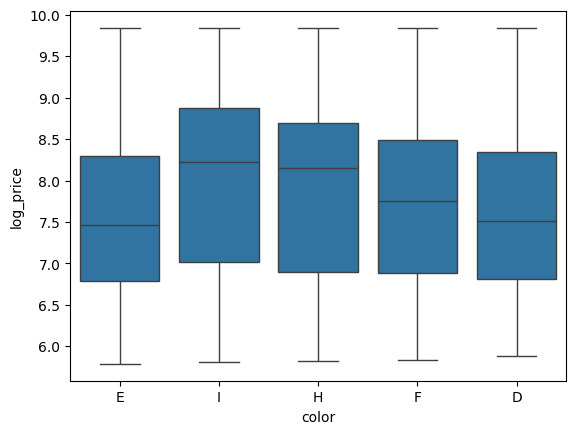

In [4]:
sns.boxplot(x = "color", y = "log_price", data = diamonds)

In [5]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [6]:
model = ols(formula = "log_price ~ C(color)", data = diamonds).fit()

In [7]:
sm.stats.anova_lm(model, typ =2)

,sum_sq,df,F,PR(>F)
C(color),1041.690290,4.0,264.987395,3.609774e-225
Residual,39148.779822,39835.0,NaN,NaN


In [8]:
model2 = ols(formula = "log_price ~ C(color) + C(cut) + C(color):C(cut)", data = diamonds2).fit()

In [9]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(color),926.361461,4.0,237.014783,3.481145e-201
C(cut),630.641441,2.0,322.706309,1.348511e-139
C(color):C(cut),27.478611,8.0,3.515279,4.531734e-04
Residual,34120.806577,34920.0,NaN,NaN


# ANOVA post hoc test

* Used to determine which **specific groups differ significantly** from each other
    * ANOVA tells us that **at least** two groups are different
    * Post hoc test tells us **which groups** are different and **how**
* Help control **Type I Errors**
    * "False positives"

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [11]:
tukey_oneway = pairwise_tukeyhsd(endog = diamonds["log_price"], groups = diamonds["color"], alpha = 0.05)

In [12]:
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1169,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.183,0.0,0.1441,0.2219,True
E,H,0.339,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True
